<a href="https://colab.research.google.com/github/JustynaD00/Project-2/blob/main/FaceID_VGGFACE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Face Detection and Recognition**
Face Detection: This involves detecting faces using facial features inorder to identify human faces in photos or videos using machine learning algorithm.

Face recognition: This involves identifying or confirming an individual's identity by matching it against a database of faces.

It is quite easy for humans to carry out face detection and recognition everyday but systems or models have to be trained and tested on huge amounts of data to be accurate.

**This version uses Haarcascade frontal face for face detection and VGG-face for face recognition**

**DeepFace**:
It is an open-source library for Python used for face recognition and facial attribute analysis. It has verification, find and analysis function which can be easily used.

In [ ]:
# Install prerequisites
!pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.9 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116934 sha256=9bbf0c45de93c225ac16c8a96e9279ab739da6fbe1272244e544fa7398e751e9
  Stored in directory: /root/.cache/pip/wheels/90/d4/f7/9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


**OpenCV**: This is a computer vision library that enhances the building of computer vision applications that can be used to perform face detection and recognition. It is imported as cv2.

**OS module**: This module allows interaction with the operating system.

In [ ]:
#import the libraries
import cv2
import os
from deepface import DeepFace


24-01-14 14:26:31 - Directory /root/.deepface created
24-01-14 14:26:31 - Directory /root/.deepface/weights created


In [ ]:
#mount your google drive
#this saves time, however you can use another method which involves uploading the images and saving them to a folder but this takes longer
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# imports the cv2_imshow function from google.colab.patches module for image display
#cv2_imshow is a utility function provided by google colab to help display images. When working in other IDE's , the regular OpenCV function , cv2.imshow should be used.
from google.colab.patches import cv2_imshow

In [ ]:
#this is a function to detect faces in images
def detectface(img):
  #load the image using OpenCV
 img = cv2.imread(img)
 #convert the image to a gray scale
 gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 #Load the Haar Cascade Classifier (a machine learning algorithm used to detect frontal faces in images or videos)
 face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
#detects each face in the image
 faces = face_cascade.detectMultiScale(gray_image, 1.1, 12)
#if there are faces detected, draw a bounding box around the face
 drawboundingbox_text(img,faces, 'Detected')
 #display the image
 cv2_imshow(img)
 #return an array containing the faces
 return faces


In [ ]:
#this is a function to draw a bounding box with a text around faces
def drawboundingbox_text(img,faces, text):
  #draw a rectangle around the face detected
  for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 2)
    startY = y
    startX = x
    y = startY - 10 if startY - 10 > 10 else startY + 10
    #add a text to the bounding box
    cv2.putText(img, text, (startX, y),cv2.FONT_HERSHEY_SIMPLEX, 1.00, (0, 255, 0), 2)

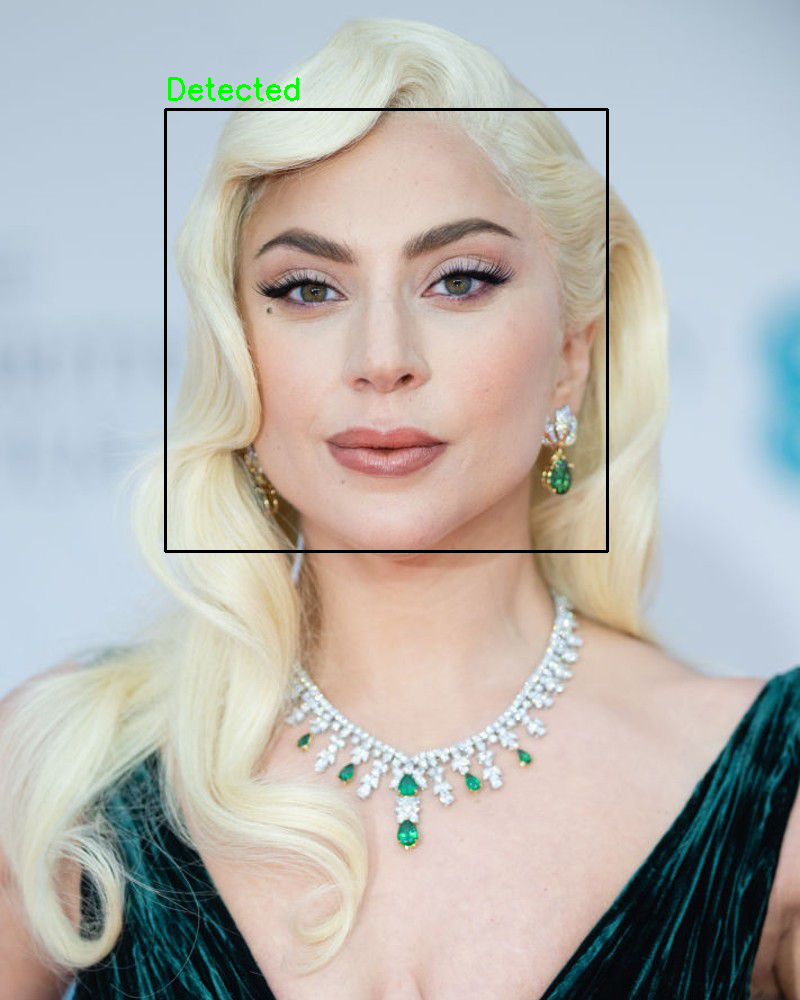

24-01-14 14:30:57 - ⚠️ Representations for images in /content/gdrive/MyDrive/Face Data folder were previously stored in representations_vgg_face.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-14 14:30:57 - There are 245 representations found in representations_vgg_face.pkl
24-01-14 14:31:00 - find function lasts 2.6757895946502686 seconds
['/content/gdrive/MyDrive/Face Data/ladygaga.jpg']


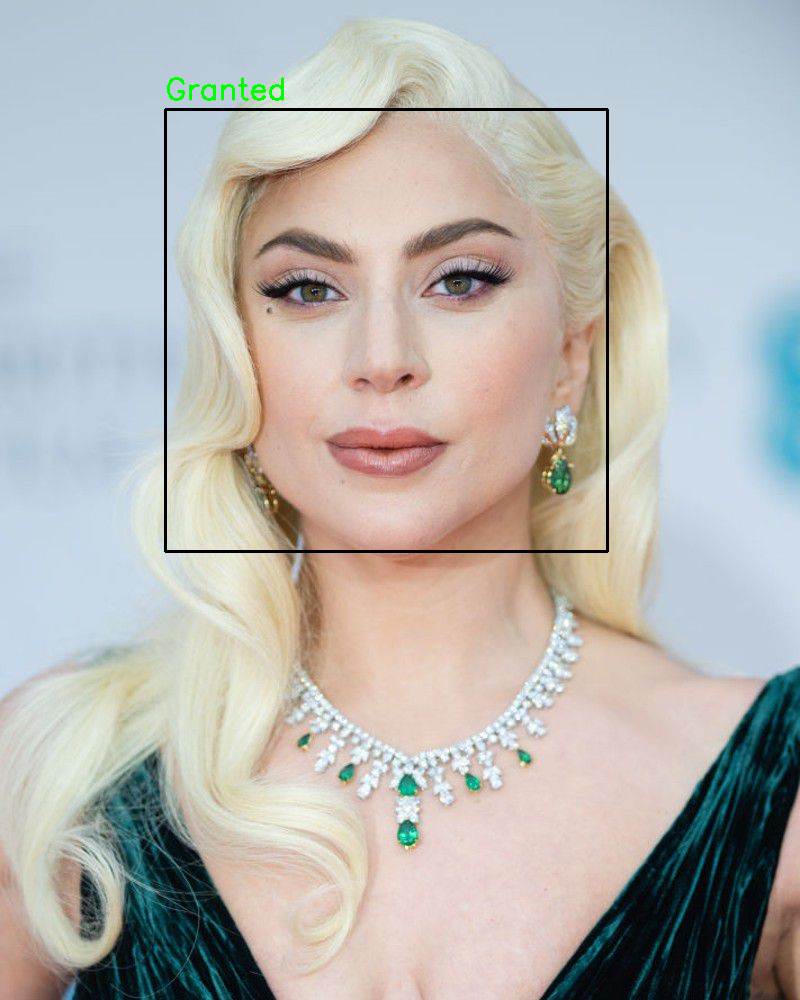

In [ ]:
#define a function to carry out face detection and recognition when called
def facerecognition(img):
  #call on the face detection function
  faces = detectface(img)
   #load the image using OpenCV
  img = cv2.imread(img)
  #list of models that can be used for the face recognition process
  models = [ "VGG-Face","Facenet","Facenet512", "OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]
  #similarity between images can be calculated using various metrics, in this project we are using euclidean_l2
  metrics = ["cosine", "euclidean", "euclidean_l2"]
   # Execute the facial recognition process using the specified image path, directory, facial recognition model and metric
  result =  DeepFace.find(img_path = img, db_path = "/content/gdrive/MyDrive/Face Data",model_name= models[0],distance_metric = metrics[2],enforce_detection= False)
  #create a dataframe to store the result
  result_df=result[0]
  #this stores the name of the image found similar to the given image
  recog_img = result_df['identity'].values[:1]
  print(recog_img)
  #if there is a match, display the image with the text 'Granted'
  if result_df.shape[0] > 0:
     drawboundingbox_text(img,faces, 'Granted')
     #display the image
     return cv2_imshow(img)
  #if there is no match, display the image with the text 'Denied'
  else:
    drawboundingbox_text(img,faces, 'Denied')
    #display the image
    return cv2_imshow(img)

#call on the face recognition function
facerecognition("/content/gdrive/MyDrive/Test images/ladygaga5.jpg")

**Scikit Learn (sklearn)** is a python library that can be used for model evaluation. It uses various metrics like precision, recall and f1-score.

We did not depend on this alone for our evaluation, we also did it manually by using excel. This is because for some cases where a face is recognized, the most similar image found is nowhere close to the test image and as such the results could be inaccurate.


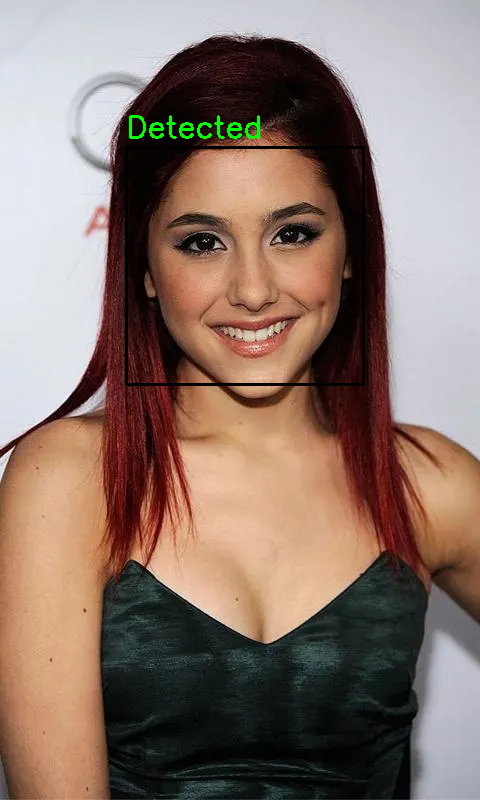

24-01-14 14:27:36 - ⚠️ Representations for images in /content/gdrive/MyDrive/Face Data folder were previously stored in representations_vgg_face.pkl. If you added new instances after the creation, then please delete this file and call find function again. It will create it again.
24-01-14 14:27:36 - There are 245 representations found in representations_vgg_face.pkl
24-01-14 14:27:38 - find function lasts 2.1196038722991943 seconds
['/content/gdrive/MyDrive/Face Data/Luis Santoyo.jpg']


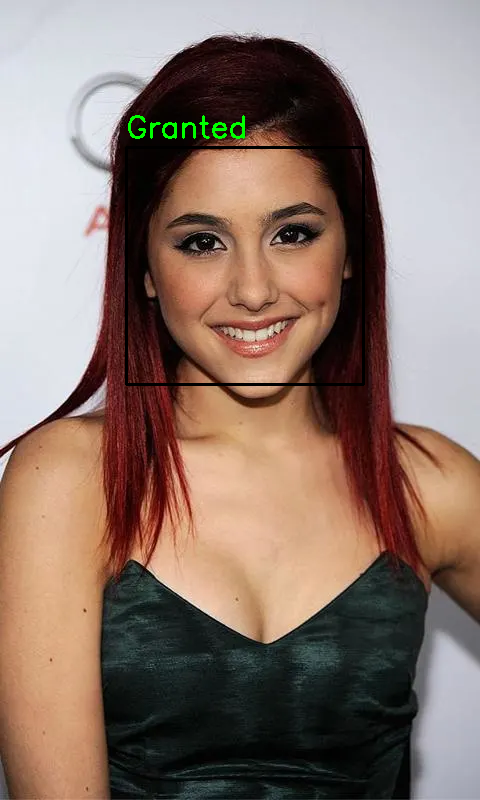

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [ ]:
import cv2
import sklearn.metrics as sk_metrics
#define a function to carry out evaluation
def evaluate_facerecognition(img,true_labels):
  #call on the face detection function
  faces = detectface(img)
   #load the image using OpenCV
  img = cv2.imread(img)
  #list of models that can be used for the face recognition process
  models = [ "VGG-Face","Facenet","Facenet512", "OpenFace","DeepFace","DeepID","ArcFace","Dlib","SFace"]
  #similarity between images can be calculated using various metrics, in this project we are using euclidean_l2
  metrics = ["cosine", "euclidean", "euclidean_l2"]
   # Execute the facial recognition process using the specified image path, directory, facial recognition model and metric
  result =  DeepFace.find(img_path = img, db_path = "/content/gdrive/MyDrive/Face Data",model_name= models[0],distance_metric = metrics[0],enforce_detection= False)
  #create a dataframe to store the result
  result_df=result[0]
  #this stores the name of the image found similar to the given image
  recog_img = result_df['identity'].values[:1]
  print(recog_img)
  #if there is a match, display the image with the text 'Access Granted'
  if result_df.shape[0] > 0:
     drawboundingbox_text(img,faces, 'Granted')
     #display the image
     cv2_imshow(img)
  #if there is no match, display the image with the text 'Access Denied'
  else:
    drawboundingbox_text(img,faces, 'Denied')
    #display the image
    cv2_imshow(img)
  #assign the predicted label to a variable
  #if there is a match, the predicted label is going to be 1 if not it's going to be 0
  predicted_labels = [1] if result_df.shape[0] > 0 else [0]
  #print the text report showing the main classification metric
  print(sk_metrics.classification_report(true_labels, predicted_labels))

# Provide the path to the image and the ground truth labels
#the ground truth label is 1 if the image is actually in the folder, else it is zero.
img_path = "/content/gdrive/MyDrive/Test images/ariana5.jpg"
evaluate_facerecognition(img_path,[1])